In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

# グラフの種類

- 折れ線グラフ
- 棒グラフ
- 散布図
- ヒストグラム
- 円グラフ

# シリーズからグラフ


# データフレームからグラフ


# 書式

- マーカー
- 線の種類・色
- 縦軸
- 横軸
- 


# 日本語でラベル表示




In [4]:
ser = pd.Series([1, 2, 3])

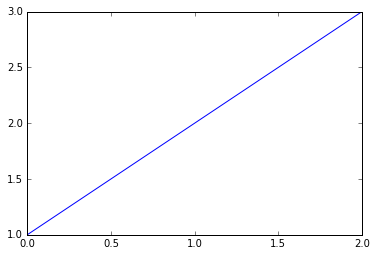

In [5]:
ser.plot()

In [6]:
df = pd.DataFrame({'a': [1, 2, 3], 'b': [1.5, 2.0, 2.5]})

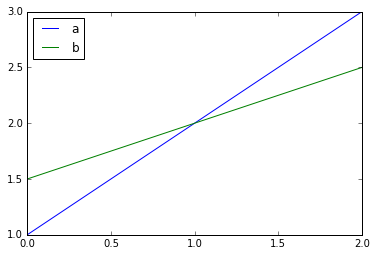

In [7]:
df.plot()

In [8]:
df_2017 = pd.read_pickle("df_2017.db")

In [9]:
df_2017.head()

,date,歩数,摂取カロリー,平均気温,最高気温,最低気温
0,2017-04-01,5439.0,2500.0,6.3,8.9,4.6
1,2017-04-02,2510.0,2300.0,8.7,14.2,4.6
2,2017-04-03,10238.0,1950.0,9.9,16.1,6.4
3,2017-04-04,8209.0,1850.0,11.2,17.3,4.5
4,2017-04-05,9434.0,1930.0,14.7,20.7,7.7


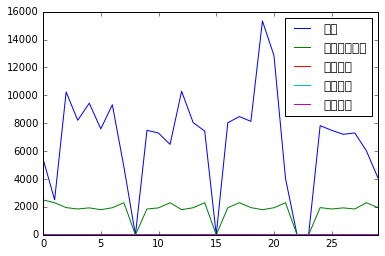

In [10]:
df_2017.plot()

# 散布図の例を作る

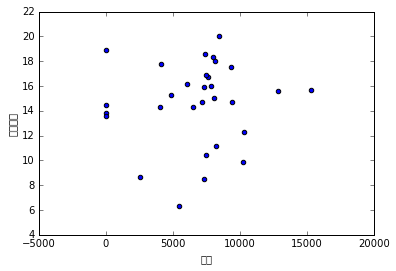

In [11]:
df_2017.plot.scatter(x='歩数', y='平均気温')

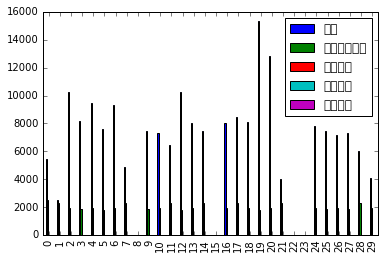

In [12]:
df_2017.plot.bar()

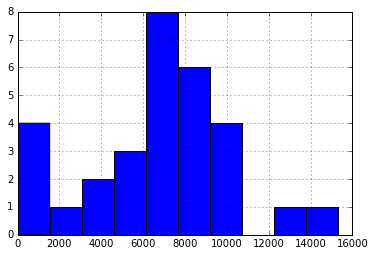

In [13]:
df_2017["歩数"].hist()

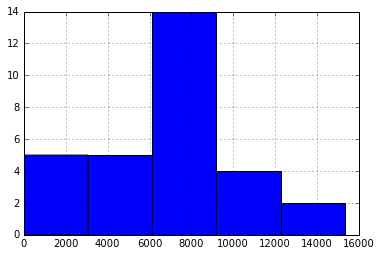

In [14]:
df_2017["歩数"].hist(bins=5)

In [15]:
df_2017["歩数"].mean()

6714.4666666666662

In [16]:
df_2017.describe()

,歩数,摂取カロリー,平均気温,最高気温,最低気温
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,6714.466667,1758.333333,14.653333,19.863333,10.176667
std,3640.329444,728.177145,3.350629,4.266589,3.181594
min,0.000000,0.000000,6.300000,8.900000,4.500000
25%,5014.500000,1850.000000,13.650000,17.625000,7.475000
50%,7463.500000,1940.000000,15.150000,20.500000,10.800000
75%,8189.750000,2212.500000,16.850000,21.600000,12.675000
max,15328.000000,2500.000000,20.000000,26.100000,15.500000


In [17]:
df_2017['歩数'].describe()

count       30.000000
mean      6714.466667
std       3640.329444
min          0.000000
25%       5014.500000
50%       7463.500000
75%       8189.750000
max      15328.000000
Name: 歩数, dtype: float64

# 円グラフの例を作る

In [18]:
df_2017[:10]['歩数']

0     5439.0
1     2510.0
2    10238.0
3     8209.0
4     9434.0
5     7593.0
6     9320.0
7     4873.0
8        0.0
9     7493.0
Name: 歩数, dtype: float64

In [19]:
beginning = df_2017[:10]['歩数'].mean()
middle = df_2017[10:20]['歩数'].mean()
end = df_2017[20:30]['歩数'].mean()

In [20]:
df_201704 = pd.Series([beginning, middle, end], index=['上旬', '中旬', '下旬'])

In [21]:
df_201704

上旬    6510.9
中旬    7950.1
下旬    5682.4
dtype: float64

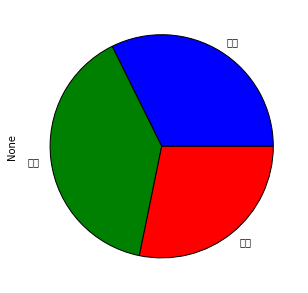

In [22]:
df_201704.plot.pie(figsize=(5, 5))

In [23]:
df_201704.describe()

count       3.000000
mean     6714.466667
std      1147.473470
min      5682.400000
25%      6096.650000
50%      6510.900000
75%      7230.500000
max      7950.100000
dtype: float64

# グループ化

In [24]:
df_2017['摂取カロリー']>2000

0      True
1      True
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11     True
12    False
13    False
14     True
15    False
16    False
17     True
18    False
19    False
20    False
21     True
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
Name: 摂取カロリー, dtype: bool

In [25]:
df_2017.groupby(df_2017['摂取カロリー']>2000)['date'].count()

摂取カロリー
False    22
True      8
Name: date, dtype: int64

In [26]:
df_2017.groupby(df_2017['摂取カロリー']>2000).mean()

,歩数,摂取カロリー,平均気温,最高気温,最低気温
摂取カロリー,,,,,
False,7098.136364,1552.272727,14.813636,20.081818,10.318182
True,5659.375000,2325.000000,14.212500,19.262500,9.787500


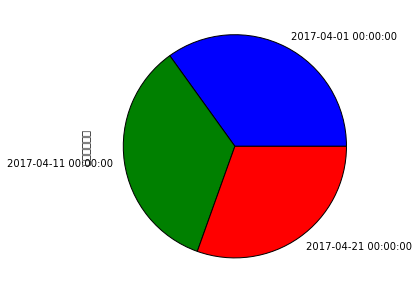

In [27]:
df_2017.groupby(pd.Grouper(key='date', freq="10d"))['摂取カロリー'].mean().plot.pie(figsize=(5, 5))